In [1]:
import sys
sys.path.insert(1, '..')
sys.path.insert(2, '../modules/')
import drms
from ruffus import *
import os
import re
import pickle
import dataconfig
import warnings

warnings.filterwarnings("ignore")

from modules import convert_datetime
from modules import query_the_data
from modules import sxi_module
from modules import helio_reg_exp_module
from time import sleep
from random import randint
from astropy.time import Time
import sqlalchemy as sa
import pandas as pd

import random

import json

loaded libraries sxi module: 0:00:00.735658
loaded libraries sxi module: 0:00:00.000030


In [2]:
client = drms.Client()

In [3]:
def make_drms_ar_availability_filename_sharp(jsoc_query_str):

    sub2 = re.sub('hmi.sharp_720s\[', '', jsoc_query_str)

    sub3 = re.sub(' ','', sub2)

    sub4 = re.sub(']', '', sub3)

    sub5 = re.sub('\[', '', sub4)

    return(sub5)

In [4]:
def make_drms_ar_availability_filename_Mharp(jsoc_query_str):
    
    sub2 = re.sub('hmi.Mharp_720s\[', '', jsoc_query_str)

    sub3 = re.sub(' ','', sub2)

    sub4 = re.sub(']', '', sub3)

    sub5 = re.sub('\[', '', sub4)

    return(sub5)

In [5]:
def make_hmi_jsoc_availability_query_string_sharp(time_ex_1, time_ex_2):

    time_str_1 = f'{time_ex_1:%Y.%m.%d}'

    time_str_2 = f'{time_ex_2:%Y.%m.%d}'

    query_str = f'hmi.sharp_720s[][{time_str_1} - {time_str_2}]'

    return(query_str)

In [6]:
def make_hmi_jsoc_availability_query_string_Mharp(time_ex_1, time_ex_2):

    time_str_1 = f'{time_ex_1:%Y.%m.%d}'

    time_str_2 = f'{time_ex_2:%Y.%m.%d}'

    query_str = f'hmi.Mharp_720s[][{time_str_1} - {time_str_2}]'

    return(query_str)

In [7]:
def convert_TAI_to_UTC(TAI_STR):
    
    sub = re.sub('\.', '-',TAI_STR)

    sub2 = re.sub('_', 'T', sub)

    sub3 = re.sub('TTAI', '', sub2)

    t = Time(sub3, scale='tai')

    utc = t.utc

    pandas_timestamp = convert_datetime.astropytime_to_pythondatetime(utc)


    return(pandas_timestamp)

In [8]:
start_download_from = '2017-05-01T00:00:00'
end_download_at = '2017-05-02T00:00:00'


START_DATE_TIME = pd.Timestamp(start_download_from, tz = 'utc')

END_DATE_TIME = pd.Timestamp(end_download_at, tz = 'utc')

frequency = '1D'

datelist = pd.date_range(start = START_DATE_TIME , end = END_DATE_TIME, freq = frequency ).tolist()

this_query_list_Mharp = [make_hmi_jsoc_availability_query_string_Mharp(previous,current) for previous,current in zip(datelist[:], datelist[1:])]

this_query_list_sharp = [make_hmi_jsoc_availability_query_string_sharp(previous,current) for previous,current in zip(datelist[:], datelist[1:])]

In [9]:
jsoc_query_Mharp = this_query_list_Mharp[0] 

jsoc_query_sharp = this_query_list_sharp[0] 


In [10]:
# hmi_series = client.series(regex=r"hmi\.", full=True)
# import textwrap
# # Print series names, prime-keys (pkeys) and notes
# for series in hmi_series.index:
#     print("Series:", hmi_series.name[series])
#     print(" Notes:", (f'\n{8 * " "}').join(textwrap.wrap(hmi_series.note[series])))

In [11]:
series_info_sharp = client.info("hmi.sharp_720s")
series_info_Mharp = client.info("hmi.Mharp_720s")


In [12]:
print(f"Listing keywords for {series_info_sharp.name}:\n")
for keyword in sorted(series_info_sharp.keywords.index):
    keyword_info = series_info_sharp.keywords.loc[keyword]
    print(keyword)
    print(f"  type ....... {keyword_info.type} ")
    print(f"  recscope ... {keyword_info.recscope} ")
    print(f"  defval ..... {keyword_info.defval} ")
    print(f"  units ...... {keyword_info.units} ")
    print(f"  note ....... {keyword_info.note} ")

Listing keywords for hmi.sharp_720s:

ABSNJZH
  type ....... float 
  recscope ... variable 
  defval ..... nan 
  units ...... (G^2)/m 
  note ....... Absolute value of the net current helicity 
ACTIVE
  type ....... int 
  recscope ... variable 
  defval ..... -2147483648 
  units ...... none 
  note ....... Mask value for active region pixels 
AMBBTHR0
  type ....... double 
  recscope ... variable 
  defval ..... nan 
  units ...... G 
  note ....... Transverse field strength threshold at disk center for using simulated annealing 
AMBBTHR1
  type ....... double 
  recscope ... variable 
  defval ..... nan 
  units ...... G 
  note ....... Transverse field strength threshold at limb for using simulated annealing 
AMBCODEV
  type ....... string 
  recscope ... variable 
  defval .....  
  units ...... none 
  note ....... Version of Disambig code 
AMBDOCU
  type ....... string 
  recscope ... variable 
  defval .....  
  units ...... none 
  note ....... Document for Disambig code 
A

In [13]:
print(f"Listing keywords for {series_info_Mharp.name}:\n")
for keyword in sorted(series_info_Mharp.keywords.index):
    keyword_info = series_info_Mharp.keywords.loc[keyword]
    print(keyword)
    print(f"  type ....... {keyword_info.type} ")
    print(f"  recscope ... {keyword_info.recscope} ")
    print(f"  defval ..... {keyword_info.defval} ")
    print(f"  units ...... {keyword_info.units} ")
    print(f"  note ....... {keyword_info.note} ")

Listing keywords for hmi.mharp_720s:

ACTIVE
  type ....... int 
  recscope ... variable 
  defval ..... -2147483648 
  units ...... none 
  note ....... Mask value for active region pixels 
AREA
  type ....... float 
  recscope ... variable 
  defval ..... nan 
  units ...... mH 
  note ....... De-projected area of patch on sphere in micro-hemisphere 
AREA_ACR
  type ....... float 
  recscope ... variable 
  defval ..... nan 
  units ...... mH 
  note ....... De-projected area of active pixels on sphere in micro-hemisphere 
ARMCODEV
  type ....... string 
  recscope ... variable 
  defval .....  
  units ...... none 
  note ....... ARmask code version 
ARMDOCU
  type ....... string 
  recscope ... variable 
  defval .....  
  units ...... none 
  note ....... ARmask code documentation 
ARM_BETA
  type ....... string 
  recscope ... variable 
  defval .....  
  units ...... none 
  note ....... ARmask parameter: Mask spatial smoothness 
ARM_EDGE
  type ....... float 
  recscope ... var

In [14]:
# keys_Mharp = 'CRPIX1, CRPIX2, CRSIZE1, CRSIZE2, T_OBS, HARPNUM,  AREA_ACR, QUALITY,NOAA_NUM, NOAA_AR, NOAA_ARS,AREA, LAT_MIN, LAT_MAX, LON_MIN, LON_MAX,T_FRST,T_LAST'
# keys_sharp = 'T_OBS, HARPNUM,  AREA_ACR, QUALITY,NOAA_NUM, NOAA_AR, NOAA_ARS,AREA, LAT_MIN, LAT_MAX, LON_MIN, LON_MAX,T_FRST,T_LAST'


In [15]:
keys_Mharp = 'AREA,CDELT1,CDELT2,CROTA2,CRPIX1,CRPIX2,CRSIZE1,CRSIZE2,DATE-OBS,HARPNUM,LAT_MAX,LAT_MIN,LON_MAX,LON_MIN,NOAA_AR,NOAA_ARS,NOAA_NUM,NPIX,QUALITY,T_FRST,T_FRST1,T_LAST,T_LAST1,T_OBS,T_REC'

In [16]:
keys_sharp = 'CDELT1,CDELT2,CROTA2,CRPIX1,CRPIX2,DATE-OBS,HARPNUM,T_FRST,T_FRST1,T_LAST,T_LAST1,T_OBS,NOAA_AR,NOAA_ARS,NOAA_NUM,LAT_MAX,LAT_MIN,LON_MAX,LON_MIN,ABSNJZH,AREA_ACR,TOTPOT,TOTUSJH,TOTUSJZ,SAVNCPP,USFLUX,MEANPOT,MEANGAM,MEANGBH,MEANALP,MEANGBT,MEANGBZ,MEANJZD,MEANJZH,MEANSHR,R_VALUE,SHRGT45'

In [17]:
hmi_ar_query_df_sharp = client.query(jsoc_query_sharp, key= keys_sharp)


In [18]:
hmi_ar_query_df_sharp.HARPNUM.unique()

array([6994, 6999])

In [19]:
copy_sharp = hmi_ar_query_df_sharp.copy()

copy_sharp['T_OBS'] = [convert_TAI_to_UTC(tai_str) for tai_str in copy_sharp['T_OBS']]

copy_sharp['T_FRST'] = [convert_TAI_to_UTC(this_tai_str) for this_tai_str in copy_sharp['T_FRST']]

copy_sharp['T_FRST1'] = [convert_TAI_to_UTC(this_tai_str) for this_tai_str in copy_sharp['T_FRST1']]

copy_sharp['T_LAST'] = [convert_TAI_to_UTC(this_tai_str) for this_tai_str in copy_sharp['T_LAST']]

copy_sharp['T_LAST1'] = [convert_TAI_to_UTC(this_tai_str) for this_tai_str in copy_sharp['T_LAST1']]


# [(this_tai_str) for this_tai_str in copy_sharp['T_FRST']]

In [20]:
copy_sharp['T_FRST_diff'] = copy_sharp['T_FRST'] -  copy_sharp['T_FRST1'] 

In [21]:
copy_sharp[['T_FRST','T_FRST1']].iloc[:5]

,T_FRST,T_FRST1
0,2017-04-20 09:47:23+00:00,2017-04-20 23:47:23+00:00
1,2017-04-20 09:47:23+00:00,2017-04-20 23:47:23+00:00
2,2017-04-20 09:47:23+00:00,2017-04-20 23:47:23+00:00
3,2017-04-20 09:47:23+00:00,2017-04-20 23:47:23+00:00
4,2017-04-20 09:47:23+00:00,2017-04-20 23:47:23+00:00


In [22]:
hmi_ar_query_df_sharp[['T_FRST','T_FRST1']].iloc[:5]

,T_FRST,T_FRST1
0,2017.04.20_09:48:00_TAI,2017.04.20_23:48:00_TAI
1,2017.04.20_09:48:00_TAI,2017.04.20_23:48:00_TAI
2,2017.04.20_09:48:00_TAI,2017.04.20_23:48:00_TAI
3,2017.04.20_09:48:00_TAI,2017.04.20_23:48:00_TAI
4,2017.04.20_09:48:00_TAI,2017.04.20_23:48:00_TAI


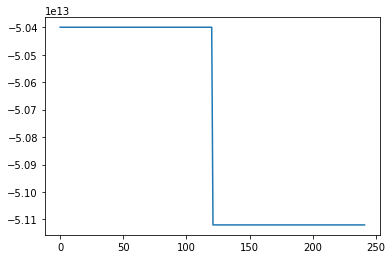

In [23]:
import matplotlib.pyplot as plt

plt.plot(copy_sharp.T_FRST_diff)

In [24]:
hmi_ar_query_df_mharp = client.query(jsoc_query_Mharp, key= keys_Mharp)
hmi_ar_query_df_mharp

,AREA,CDELT1,CDELT2,CROTA2,CRPIX1,CRPIX2,CRSIZE1,CRSIZE2,DATE-OBS,HARPNUM,...,NOAA_ARS,NOAA_NUM,NPIX,QUALITY,T_FRST,T_FRST1,T_LAST,T_LAST1,T_OBS,T_REC
0,NaN,0.504341,0.504341,180.013489,167.0,1274.0,272,522,2017-04-30T23:58:41.80Z,6986,...,"12651,12652",2,NaN,0,2017.04.16_21:24:00_TAI,2017.04.17_19:24:00_TAI,2017.05.01_22:12:00_TAI,2017.04.30_22:12:00_TAI,2017.05.01_00:00:04_TAI,2017.05.01_00:00:00_TAI
1,NaN,0.504341,0.504341,180.013428,167.0,1274.0,270,522,2017-05-01T00:10:41.80Z,6986,...,"12651,12652",2,NaN,0,2017.04.16_21:24:00_TAI,2017.04.17_19:24:00_TAI,2017.05.01_22:12:00_TAI,2017.04.30_22:12:00_TAI,2017.05.01_00:12:04_TAI,2017.05.01_00:12:00_TAI
2,NaN,0.504342,0.504342,180.013519,167.0,1275.0,269,521,2017-05-01T00:22:41.80Z,6986,...,"12651,12652",2,NaN,0,2017.04.16_21:24:00_TAI,2017.04.17_19:24:00_TAI,2017.05.01_22:12:00_TAI,2017.04.30_22:12:00_TAI,2017.05.01_00:24:04_TAI,2017.05.01_00:24:00_TAI
3,NaN,0.504342,0.504342,180.013535,167.0,1275.0,268,521,2017-05-01T00:34:41.80Z,6986,...,"12651,12652",2,NaN,0,2017.04.16_21:24:00_TAI,2017.04.17_19:24:00_TAI,2017.05.01_22:12:00_TAI,2017.04.30_22:12:00_TAI,2017.05.01_00:36:04_TAI,2017.05.01_00:36:00_TAI
4,NaN,0.504340,0.504340,180.013596,167.0,1275.0,267,521,2017-05-01T00:46:41.80Z,6986,...,"12651,12652",2,NaN,4096,2017.04.16_21:24:00_TAI,2017.04.17_19:24:00_TAI,2017.05.01_22:12:00_TAI,2017.04.30_22:12:00_TAI,2017.05.01_00:48:04_TAI,2017.05.01_00:48:00_TAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,NaN,0.504343,0.504343,180.013428,292.0,1293.0,44,66,2017-05-01T15:10:41.80Z,7001,...,MISSING,0,NaN,0,2017.04.29_05:36:00_TAI,2017.04.30_05:36:00_TAI,2017.05.01_16:00:00_TAI,2017.04.30_16:00:00_TAI,2017.05.01_15:12:04_TAI,2017.05.01_15:12:00_TAI
431,NaN,0.504342,0.504342,180.013428,291.0,1293.0,45,66,2017-05-01T15:22:41.80Z,7001,...,MISSING,0,NaN,0,2017.04.29_05:36:00_TAI,2017.04.30_05:36:00_TAI,2017.05.01_16:00:00_TAI,2017.04.30_16:00:00_TAI,2017.05.01_15:24:04_TAI,2017.05.01_15:24:00_TAI
432,NaN,0.504342,0.504342,180.013550,291.0,1294.0,44,66,2017-05-01T15:34:41.80Z,7001,...,MISSING,0,NaN,0,2017.04.29_05:36:00_TAI,2017.04.30_05:36:00_TAI,2017.05.01_16:00:00_TAI,2017.04.30_16:00:00_TAI,2017.05.01_15:36:04_TAI,2017.05.01_15:36:00_TAI
433,NaN,0.504342,0.504342,180.013489,291.0,1294.0,43,66,2017-05-01T15:46:41.80Z,7001,...,MISSING,0,NaN,0,2017.04.29_05:36:00_TAI,2017.04.30_05:36:00_TAI,2017.05.01_16:00:00_TAI,2017.04.30_16:00:00_TAI,2017.05.01_15:48:04_TAI,2017.05.01_15:48:00_TAI


In [25]:
copy_Mharp = hmi_ar_query_df_mharp.copy()

copy_Mharp['T_OBS'] = [convert_TAI_to_UTC(tai_str) for tai_str in copy_Mharp['T_OBS']]

copy_Mharp['T_FRST'] = [convert_TAI_to_UTC(this_tai_str) for this_tai_str in copy_Mharp['T_FRST']]

copy_Mharp['T_FRST1'] = [convert_TAI_to_UTC(this_tai_str) for this_tai_str in copy_Mharp['T_FRST1']]

copy_Mharp['T_LAST'] = [convert_TAI_to_UTC(this_tai_str) for this_tai_str in copy_Mharp['T_LAST']]

copy_Mharp['T_LAST1'] = [convert_TAI_to_UTC(this_tai_str) for this_tai_str in copy_Mharp['T_LAST1']]

In [26]:
copy_Mharp[['LAT_MAX','LAT_MIN','LON_MAX','LON_MIN', 'HARPNUM']].dropna()



,LAT_MAX,LAT_MIN,LON_MAX,LON_MIN,HARPNUM
112,-6.525166,-15.095042,48.050018,29.585949,6994
113,-6.537925,-15.091043,48.166187,29.698116,6994
114,-6.538575,-15.087453,48.269485,29.830412,6994
115,-6.532375,-15.081419,48.370453,29.942955,6994
116,-6.528058,-15.077265,48.490818,30.078804,6994
...,...,...,...,...,...
349,13.716012,7.601220,-10.328846,-21.913420,6999
350,13.714122,7.601761,-10.205094,-21.807419,6999
351,13.713449,7.602882,-10.110203,-21.678661,6999
352,13.712739,7.604383,-9.985354,-21.572670,6999


In [27]:
copy_sharp[['LAT_MAX','LAT_MIN','LON_MAX','LON_MIN', 'HARPNUM']]

,LAT_MAX,LAT_MIN,LON_MAX,LON_MIN,HARPNUM
0,-6.525166,-15.095042,48.050018,29.585949,6994
1,-6.537925,-15.091043,48.166187,29.698116,6994
2,-6.538575,-15.087453,48.269485,29.830412,6994
3,-6.532375,-15.081419,48.370453,29.942955,6994
4,-6.528058,-15.077265,48.490818,30.078804,6994
...,...,...,...,...,...
237,13.716012,7.601220,-10.328846,-21.913420,6999
238,13.714122,7.601761,-10.205094,-21.807419,6999
239,13.713449,7.602882,-10.110203,-21.678661,6999
240,13.712739,7.604383,-9.985354,-21.572670,6999


In [28]:
B = copy_Mharp[['LAT_MAX','LAT_MIN','LON_MAX','LON_MIN', 'HARPNUM']].dropna()
B

,LAT_MAX,LAT_MIN,LON_MAX,LON_MIN,HARPNUM
112,-6.525166,-15.095042,48.050018,29.585949,6994
113,-6.537925,-15.091043,48.166187,29.698116,6994
114,-6.538575,-15.087453,48.269485,29.830412,6994
115,-6.532375,-15.081419,48.370453,29.942955,6994
116,-6.528058,-15.077265,48.490818,30.078804,6994
...,...,...,...,...,...
349,13.716012,7.601220,-10.328846,-21.913420,6999
350,13.714122,7.601761,-10.205094,-21.807419,6999
351,13.713449,7.602882,-10.110203,-21.678661,6999
352,13.712739,7.604383,-9.985354,-21.572670,6999


In [29]:
A = copy_sharp[['LAT_MAX','LAT_MIN','LON_MAX','LON_MIN', 'HARPNUM']].reset_index(drop = True)
B = copy_Mharp[['LAT_MAX','LAT_MIN','LON_MAX','LON_MIN', 'HARPNUM']].dropna().reset_index(drop = True)


diff = A[['LAT_MAX', 'LAT_MIN', 'LON_MAX', 'LON_MIN', 'HARPNUM']] - B[['LAT_MAX', 'LAT_MIN', 'LON_MAX', 'LON_MIN', 'HARPNUM']]

non_zero_diff = diff[(diff != 0).any(axis=1)]

non_zero_diff


,LAT_MAX,LAT_MIN,LON_MAX,LON_MIN,HARPNUM


In [30]:
def create_boundary_box(AR_DF_ROW):

    x_min, x_max, y_min, y_max = AR_DF_ROW.CRPIX1, AR_DF_ROW.CRPIX1 + AR_DF_ROW.CRSIZE1, AR_DF_ROW.CRPIX2, AR_DF_ROW.CRPIX2 + AR_DF_ROW.CRSIZE2

    list = [[x_min, y_min], [x_min, y_max], [x_max, y_max], [x_max, y_min], [x_min, y_min]]

    return(list)

In [31]:
hmi_ar_query_df['pix_harp_bbox'] = [create_boundary_box(row) for row in hmi_ar_query_df.itertuples()]

hmi_ar_query_df

NameError: name 'hmi_ar_query_df' is not defined

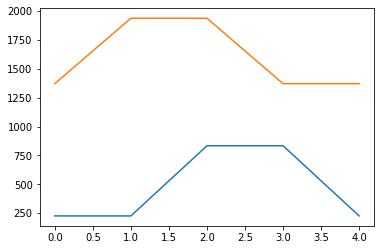

In [21]:
import matplotlib.pyplot as plt
plt.plot(hmi_ar_query_df.iloc[0].pix_harp_bbox)

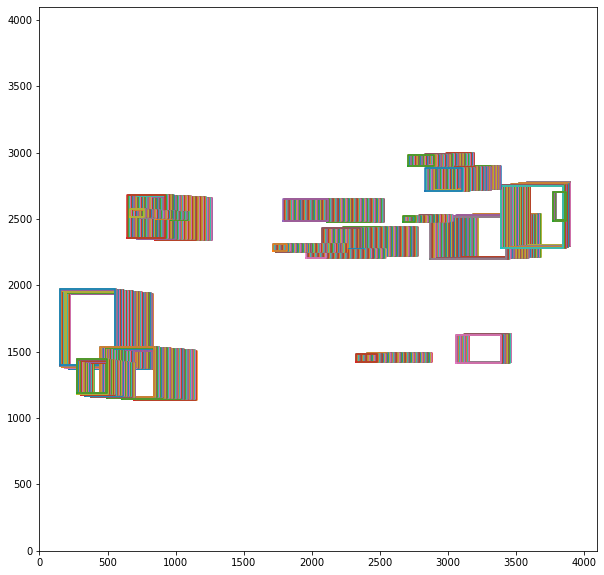

In [35]:
import numpy as np

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

ax.set_ylim(0,4096)
ax.set_xlim(0,4096)

for harp_num, group in hmi_ar_query_df.groupby(['HARPNUM']):

    for _, row in group.iterrows():

        array_bbox = np.array(row.pix_harp_bbox)

        ax.plot(array_bbox[:,0], array_bbox[:,1])

# ax.legend()      